<font color='black'>
Content:

1. [DATA PREPARATION](#1) 
2. [LSTM MODEL](#2)
3. [PREDICTIONS AND VISUALISING](#3)

In [281]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-airline-passengers/international-airline-passengers.csv


In [282]:
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

<a id="1"></a><br>
# DATA PREPARATION

In [284]:
data = pd.read_csv('/kaggle/input/international-airline-passengers/international-airline-passengers.csv',skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [285]:
data.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Month                                                                           142 non-null    object
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  142 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


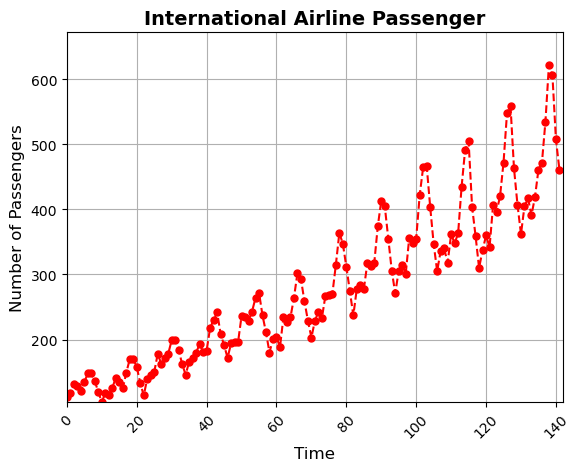

In [286]:
dataset = data.iloc[:, 1].values

plt.plot(dataset, color='red', linestyle='dashed', marker='o', markersize=5)
plt.xlabel("Time", fontsize=12, fontname="Arial")
plt.ylabel("Number of Passengers", fontsize=12, fontname="Arial")
plt.title("International Airline Passenger", fontsize=14, fontweight="bold", fontname="Arial")
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(0, len(dataset))
plt.ylim(min(dataset), max(dataset) + 50)

plt.show()

In [287]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [288]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [289]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 71, test size: 71 


In [290]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [291]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY) 

In [292]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [293]:
trainX.shape

(60, 1, 10)

<a id="2"></a><br>
# LSTM MODEL

In [294]:
# model
model = Sequential()
model.add(LSTM(20, input_shape=(1, time_stemp),return_sequences=True)) # 20 lstm neuron
model.add(LSTM(30))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=40, batch_size=1)

Epoch 1/40
60/60 [==============================] - 3s 3ms/step - loss: 0.0131
Epoch 2/40
60/60 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 3/40
60/60 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 4/40
60/60 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 5/40
60/60 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 6/40
60/60 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 7/40
60/60 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 8/40
60/60 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 9/40
60/60 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 10/40
60/60 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 11/40
60/60 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 12/40
60/60 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 13/40
60/60 [==============================

<a id="3"></a><br>
# PREDICTIONS AND VISUALISING

In [295]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 6ms/step
Train Score: 16.27 RMSE
Test Score: 46.61 RMSE


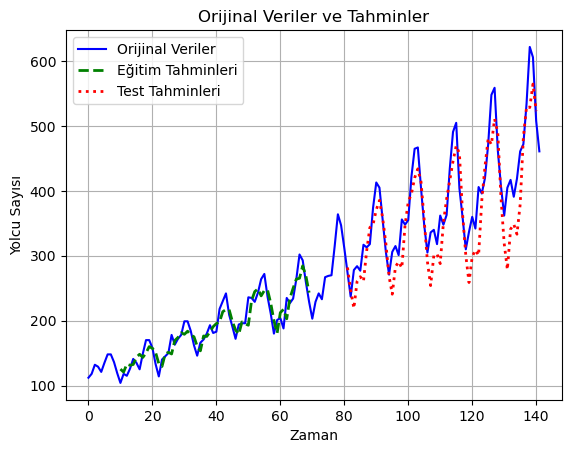

In [296]:
# Orijinal verileri çiz
plt.plot(scaler.inverse_transform(dataset), label='Orijinal Veriler', color='blue')

# Eğitim tahminlerini çiz
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
plt.plot(trainPredictPlot, label='Eğitim Tahminleri', color='green', linestyle='dashed', linewidth=2)

# Test tahminlerini çiz
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
plt.plot(testPredictPlot, label='Test Tahminleri', color='red', linestyle='dotted', linewidth=2)

# Eksen etiketlerini ve başlığı ekle
plt.xlabel("Zaman")
plt.ylabel("Yolcu Sayısı")
plt.title("Orijinal Veriler ve Tahminler")
plt.grid(True)

# Görseldeki veri etiketlerini göster
plt.legend()

# Grafik penceresini göster
plt.show()